# Задача

Вам дан файл `beauty.csv`, в котором собраны несколько факторов про различных людей (мужчин и женщин): зарплата, опыт, цвет кожи, здоровье и т.д.

В последней колонке - целевое значение, которое требуется предсказать. Это то, как выглядит человек (красота) по шкале от 1 до 5. Принимаем, что это задача регрессии, т.е. на выходе могут получаться предикты вроде 3.6

Сначала нужно считать файл и убедиться, что все корректно сохранилось в таблицу.

In [1]:
import pandas as pd

In [68]:
with open('beauty.csv') as f:
    df = pd.read_csv(f, sep=';')

In [69]:
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [70]:
df.dtypes

wage        float64
exper         int64
union         int64
goodhlth      int64
black         int64
female        int64
married       int64
service       int64
educ          int64
looks         int64
dtype: object

#### Вывести распределение таргета

Визуально определить, к какому распределению принадлежит эта величина

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

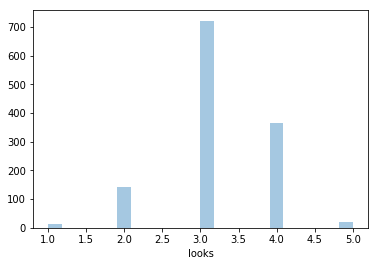

In [72]:
sns.distplot(df['looks'], kde=False)
plt.show()

#### Разделить выборку на train и test с помощью sklearn

А потом убедиться, что распределения таргетов в каждой выборке схожи.

In [73]:
from sklearn import model_selection

In [74]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df[['wage','exper','union','goodhlth','black','female','married','service','educ']], 
    df['looks'], 
    test_size=0.33, 
    random_state=42,
)

In [75]:
X_train.shape

(844, 9)

In [76]:
X_test.shape

(416, 9)

#### Провести регрессионный анализ

In [77]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

In [78]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Посмотрим на коэффициенты и свободный член

In [79]:
lr.coef_

array([ 0.00914542, -0.00847274, -0.0045655 ,  0.08089714,  0.07853578,
        0.04869817, -0.02100824, -0.03600616,  0.02962055])

In [80]:
lr.intercept_

2.8338256360568224

In [82]:
import numpy as np

In [83]:
coefs_arr = np.array(sorted(
    list(zip(df.columns[:-1], lr.coef_)), 
    key=lambda x: x[1],
    reverse=True,
))
coefs_arr

array([['goodhlth', '0.0808971356296046'],
       ['black', '0.07853577637113633'],
       ['female', '0.04869817457501937'],
       ['educ', '0.029620554458848515'],
       ['wage', '0.009145418127225078'],
       ['union', '-0.00456550344524792'],
       ['exper', '-0.00847273576911231'],
       ['married', '-0.021008242701595542'],
       ['service', '-0.03600616064495338']], dtype='<U21')

#### Вывести с помощью barh значимость факторов

Что влияет сильнее всего? Слабее всего?

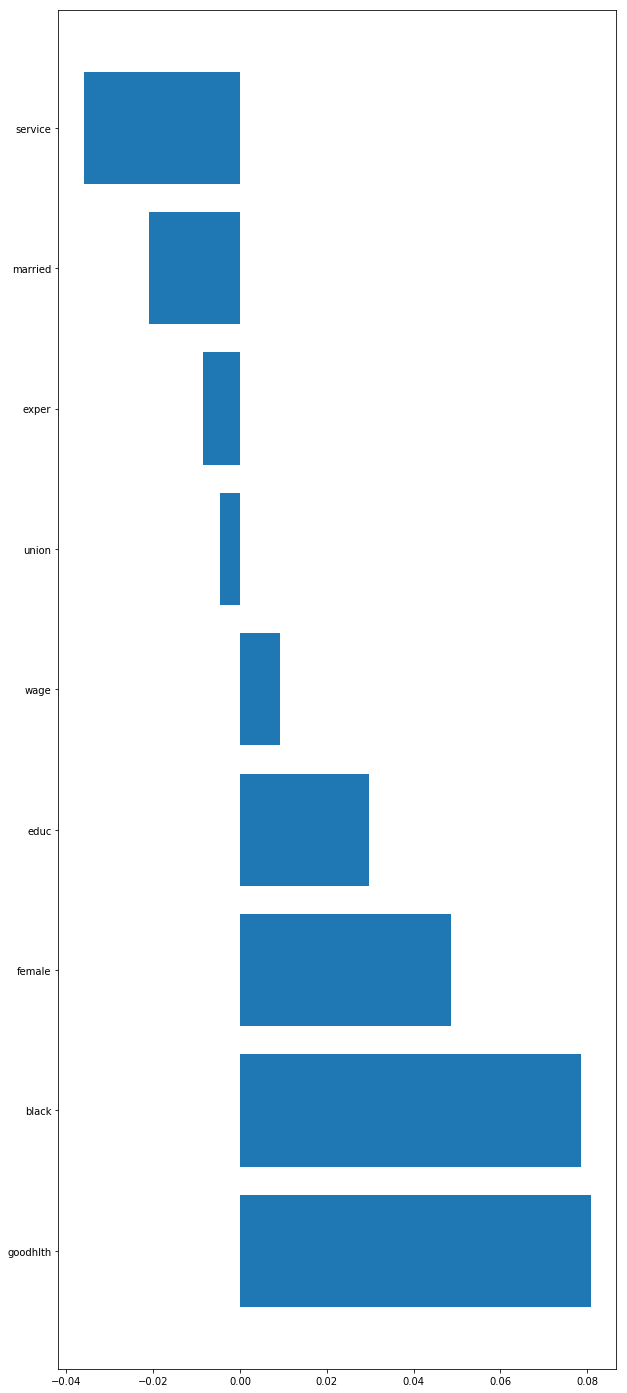

In [84]:
fig = plt.figure(figsize=[10, 25])
plt.barh(coefs_arr[:, 0], coefs_arr[:, 1].astype(float))
plt.show()

#### Посчитать ошибку (какую сочтете нужным)

## Задание 2

Провести аналогичный регрессионный анализ, но реализовать Метод наименьших квадратов (МНК) самостоятельно, не используя функции библиотеки sklearn.

## Задание 3

Добавить фактор looks_good(если looks больше 3, то 1, меньше 0)

Не использую looks предсказать использия логистическую регрессию looks_good

In [ ]:
# your code here